In [4]:
import pandas as pd
import numpy as np
from scipy.stats import stats

In [5]:
def CDS_code_maker(CC, DC, SC):
    if len(str(int(CC)))<2:
        CC = '0'+ str(int(CC))
    else:
        CC = str(int(CC))
    DC = str(int(DC))
    if len(str(int(SC)))<7:
        SC = '0'*(7-len(str(int(SC))))+ str(int(SC))
    else:
        SC = str(int(SC))
    if len(CC+DC+SC) != 14:
        print(CC+DC+SC)
    return CC+DC+SC

In [6]:
path = 'CA_edu_data/'

In [7]:
numeric = ['CohortStudents', 'RegularHSGradCount',
       'RegularHSGradRate', 'MetUCCSUCount', 'MetUCCSURate',
       'SealOfBiliteracyCount', 'SealOfBiliteracyRate',
       'GoldenStateSealMeritCount', 'GoldenStateSealMeritRate',
       'CHSPECompleterCount', 'CHSPECompleterRate', 'AdultEdDiplomaCount',
       'AdultEdDiplomaRate', 'SPEDCertificateCount', 'SPEDCertificateRate',
       'GEDCompleterCount', 'GEDCompleterRate', 'OtherTransferCount',
       'OtherTransferRate', 'DropoutCount', 'DropoutRate',
       'StillEnrolledCount', 'StillEnrolledRate']

In [8]:
grad_rates = pd.read_table(path+'grad_rates_cohort1617.txt', sep = '\t')
grad_rates = grad_rates[(grad_rates.AggLevel == 'S') & (grad_rates.DASSYN == 'No')& (grad_rates.CharterYN != 'All')]
grad_rates['CDS'] = [CDS_code_maker(grad_rates.CountyCode.iloc[ik], grad_rates.DistrictCode.iloc[ik], grad_rates.SchoolCode.iloc[ik]) for ik in range(len(grad_rates))]
grad_rates.reset_index()
grad_rates.set_index('CDS')

for col in numeric:
    try: 
        grad_rates[col] = grad_rates[col].str.replace("*", "0")
    except:
        print('no dice')
    grad_rates[col] = pd.to_numeric(grad_rates[col])

In [9]:
schools = grad_rates.groupby('CDS')
repcats = grad_rates.groupby('ReportingCategory')

In [10]:
repcat_cols = ['CohortStudents', 'RegularHSGradCount','RegularHSGradRate', 'MetUCCSUCount', 'MetUCCSURate','DropoutCount', 'DropoutRate']
# gradmeta_cols = ['CountyName', 'DistrictName', 'SchoolName','CDS', 'CharterYN']

In [354]:
grad_rates2 = grad_rates[['CDS', 'CharterYN']].drop_duplicates()

for repcat in repcats:
    sub_df = repcat[1][['CDS']]
    sub_df.set_index(['CDS'])
    for col in repcat_cols:
        sub_df[col+ '_' + repcat[0]] = repcat[1][col]
    grad_rates2 = grad_rates2.join(sub_df.set_index(['CDS'], verify_integrity=True), on = ['CDS'], how = 'outer')

grad_rates2.reset_index()
grad_rates2 = grad_rates2.set_index(['CDS'])

# grad_rates2['CohortStudents_All'] = grad_rates2.CohortStudents_GF + grad_rates2.CohortStudents_GM

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [355]:
grad_rates2['CohortStudents_All'] = grad_rates2.CohortStudents_GF + grad_rates2.CohortStudents_GM
grad_rates2['RegularHSGradCount_All'] = grad_rates2.RegularHSGradCount_GF + grad_rates2.RegularHSGradCount_GM
grad_rates2['MetUCCSUCount_All'] = grad_rates2.MetUCCSUCount_GF + grad_rates2.MetUCCSUCount_GM
grad_rates2['RegularHSGradRate_All'] = grad_rates2.RegularHSGradCount_All / grad_rates2.CohortStudents_All
grad_rates2['MetUCCSURate_All'] = grad_rates2.MetUCCSUCount_All / grad_rates2.CohortStudents_All

In [356]:
grad_rates2 = grad_rates2.drop(['CharterYN'], axis= 1)

In [156]:
def split_GS(grades_vect):

    def splitter(offered):
        try:
            [min_grade, max_grade] = offered.split('-')
            if min_grade == 'K':
                min_grade = 0
            if float(max_grade)>12:
                max_grade = 13
        except:
            [min_grade, max_grade] = [np.nan, np.nan]
        return min_grade, max_grade

    min_grdes = []
    max_grdes = []
    for ik in range(len(grades_vect)):
        min_grade, max_grade = splitter(grades_vect[ik])
        min_grdes.append(float(min_grade))
        max_grdes.append(float(max_grade))
        
    return min_grdes, max_grdes

In [230]:
school_meta = pd.read_table(path + 'pubschls.txt', sep = '\t')
school_meta = school_meta.rename(columns={'CDSCode':'CDS'})
school_meta['CDS'] = school_meta['CDS'].astype(str)#.apply(str)

In [289]:
HS = school_meta[(school_meta.EdOpsCode == 'TRAD') & 
                 (school_meta.EILCode == 'HS') & 
                 (school_meta.StatusType == 'Active')]

In [290]:
for ik in HS.index:
    if len(HS['CDS'][ik])<14:
        repl = '0'*(14-len(HS['CDS'][ik])) + HS['CDS'][ik]
        HS['CDS'][ik] = repl

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [291]:
HS['CharterYN'] = [1 if school== 'Y' else 0 for school in HS.Charter]
HS['MagnetYN'] = [1 if school== 'Y' else 0 for school in HS.Magnet]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [292]:
len(HS['CharterYN']), len(HS.Charter)

(1365, 1365)

In [148]:
meta_cols = ['CDS', 'NCESDist', 'NCESSchool', 'StatusType', 'County', 'District',
       'School', 'City', 'Zip', 'OpenDate', 'ClosedDate', 'Charter', 'CharterNum',
       'FundingType', 'DOC', 'DOCType', 'SOC', 'SOCType', 'EdOpsCode',
       'EdOpsName', 'EILCode', 'EILName', 'GSoffered', 'GSserved', 'Virtual',
       'Magnet', 'Latitude', 'Longitude', 'CharterYN', 'MagnetYN']

In [293]:
# _HS = HS

In [357]:
# HS = _HS

In [358]:
meta_cols = ['CDS', 'District', 'OpenDate',
             'CharterYN', 'MagnetYN', 'GSoffered', 'GSserved']

In [359]:
HS = HS[meta_cols]
HS.reset_index()
HS = HS.set_index('CDS')

In [360]:
min_grades, max_grades = split_GS(HS.GSoffered)
HS['GSoffered_min'] = min_grades
HS['GSoffered_max'] = max_grades

min_grades, max_grades = split_GS(HS.GSserved)
HS['GSserved_min'] = min_grades
HS['GSserved_max'] = max_grades

In [361]:
HS = HS[(HS.GSserved_min==9) & (HS.GSserved_max==12)]

In [362]:
HS = HS.join(grad_rates2, how= 'left')

In [32]:
EL_numeric = ['KDGN', 'GR_1',
       'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'GR_9', 'GR_10',
       'GR_11', 'GR_12', 'UNGR', 'TOTAL_EL']

In [308]:
EL.columns

Index(['COUNTY', 'DISTRICT', 'SCHOOL', 'LC', 'LANGUAGE', 'KDGN', 'GR_1',
       'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'GR_9', 'GR_10',
       'GR_11', 'GR_12', 'UNGR', 'TOTAL_EL'],
      dtype='object')

In [38]:
EL = pd.read_csv(path+ 'eng_learn1617_corr.csv')
for col in EL_numeric:
    EL[col] = pd.to_numeric(EL[col])
    
EL['CDS'] = EL['CDS'].apply(str)
EL.reset_index()
EL = EL.set_index(['CDS'])


In [197]:
# Number of languages with data
len(langs)


66

In [43]:
# EL.to_csv(path+'eng_learn1617_corr.csv')

In [363]:
lang_cols = ['GR_9', 'GR_10', 'GR_11', 'GR_12']
langs = EL.groupby('LANGUAGE')

HS2 = HS
langs_d =  {'lang' : [], 'total': []}
for lang in langs:
    sub_df = lang[1][lang_cols]
    sub_df = sub_df.reindex(columns=lang_cols+ ['ALL'])
    sub_df['ALL'] = lang[1]['GR_12']+lang[1]['GR_11']+ lang[1]['GR_10']+ lang[1]['GR_9']
    langs_d['lang'].append(lang[0])
    langs_d['total'].append(sum(sub_df['ALL']))
    sub_df = sub_df.rename(columns={col:col+ '_' + lang[0] for col in sub_df.columns})
    HS2 = HS2.join(sub_df)#.set_index(['CDS'], verify_integrity=True), on = ['CDS'], how = 'outer')
    HS2[sub_df.columns] = HS2[sub_df.columns].fillna(0)

In [433]:
HS2.columns[:50]

Index(['District', 'OpenDate', 'CharterYN', 'MagnetYN', 'GSoffered',
       'GSserved', 'GSoffered_min', 'GSoffered_max', 'GSserved_min',
       'GSserved_max', 'CohortStudents_GF', 'RegularHSGradCount_GF',
       'RegularHSGradRate_GF', 'MetUCCSUCount_GF', 'MetUCCSURate_GF',
       'DropoutCount_GF', 'DropoutRate_GF', 'CohortStudents_GM',
       'RegularHSGradCount_GM', 'RegularHSGradRate_GM', 'MetUCCSUCount_GM',
       'MetUCCSURate_GM', 'DropoutCount_GM', 'DropoutRate_GM',
       'CohortStudents_GN', 'RegularHSGradCount_GN', 'RegularHSGradRate_GN',
       'MetUCCSUCount_GN', 'MetUCCSURate_GN', 'DropoutCount_GN',
       'DropoutRate_GN', 'CohortStudents_RA', 'RegularHSGradCount_RA',
       'RegularHSGradRate_RA', 'MetUCCSUCount_RA', 'MetUCCSURate_RA',
       'DropoutCount_RA', 'DropoutRate_RA', 'CohortStudents_RB',
       'RegularHSGradCount_RB', 'RegularHSGradRate_RB', 'MetUCCSUCount_RB',
       'MetUCCSURate_RB', 'DropoutCount_RB', 'DropoutRate_RB',
       'CohortStudents_RD', 'Reg

In [364]:
HS2['Total_EL'] = [sum([HS2[HS2.index ==ind][col][0] if 'ALL_' in col else 0 for col in HS2.columns]) for ind in HS2.index]
HS2['Total_EL_9'] = [sum([HS2[HS2.index ==ind][col][0] if 'GR_9_' in col else 0 for col in HS2.columns]) for ind in HS2.index]
HS2['Total_EL_12'] = [sum([HS2[HS2.index ==ind][col][0] if 'GR_12_' in col else 0 for col in HS2.columns]) for ind in HS2.index]


In [534]:
HS2['ELRate_12'] = HS2['Total_EL_12']/HS2['CohortStudents_All']
HS2['ELRate_12'] = HS2['ELRate_12'].dropna()

In [536]:
HS2['ELRate_12']

CDS
01100170112607    0.123457
01611190130229    0.095238
01611190130625    0.351351
01611270130450    0.059603
01611430131177    0.049457
01611500132225    0.043785
01611680132746    0.108108
01611760130062    0.057426
01611760134270    0.062374
01611760134452    0.130682
01611760135244    0.022774
01611760138693    0.095355
01611920108670    0.097561
01611920127944    0.054054
01611920133629    0.051515
01611920135319    0.058568
01611920138339    0.282282
01612000133397    0.044304
01612000134536    0.036585
01612340130054    0.046243
01612420134668    0.152522
01612590100065    0.126984
01612590100701    0.097561
01612590108944    0.053571
01612590110189    0.029412
01612590111856    0.057143
01612590114868    0.024390
01612590115238    0.320000
01612590125161    0.140845
01612590125716    0.360294
                    ...   
56725205634076    0.035928
56725460120634    0.000000
56725460131698         NaN
56725465630389    0.080966
56725465631619    0.018692
56725465631742    0.1654

In [547]:
HS_sub = HS2[['CohortStudents_All', 
              'CohortStudents_GF', 'CohortStudents_GM', 'CohortStudents_RA', 'CohortStudents_RB', 'CohortStudents_RH',
              'RegularHSGradRate_GF', 'RegularHSGradRate_GM', 'RegularHSGradRate_RA', 'RegularHSGradRate_RB','RegularHSGradRate_RH',
              'MetUCCSURate_GF','MetUCCSURate_GM','MetUCCSURate_RA','MetUCCSURate_RB', 'MetUCCSURate_RH', 'ELRate_12', 'MetUCCSURate_TA',
              'District', 'CharterYN']].dropna()



In [554]:
HS_sub['CohortStudentsRate_GF'] = HS_sub['CohortStudents_GF']/HS_sub['CohortStudents_All']*100
HS_sub['CohortStudentsRate_GM'] = HS_sub['CohortStudents_GM']/HS_sub['CohortStudents_All']*100
HS_sub['CohortStudentsRate_RA'] = HS_sub['CohortStudents_RA']/HS_sub['CohortStudents_All']*100
HS_sub['CohortStudentsRate_RB'] = HS_sub['CohortStudents_RB']/HS_sub['CohortStudents_All']*100
HS_sub['CohortStudentsRate_RH'] = HS_sub['CohortStudents_RH']/HS_sub['CohortStudents_All']*100

In [555]:
HS_sub.describe()

,CohortStudents_All,CohortStudents_GF,CohortStudents_GM,CohortStudents_RA,CohortStudents_RB,CohortStudents_RH,RegularHSGradRate_GF,RegularHSGradRate_GM,RegularHSGradRate_RA,RegularHSGradRate_RB,...,MetUCCSURate_RB,MetUCCSURate_RH,ELRate_12,MetUCCSURate_TA,CharterYN,CohortStudentsRate_GF,CohortStudentsRate_GM,CohortStudentsRate_RA,CohortStudentsRate_RB,CohortStudentsRate_RH
count,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,...,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000
mean,394.792824,195.736111,199.056713,42.027778,19.872685,192.085648,94.126389,90.277778,56.533912,46.189352,...,22.360417,46.326505,0.083107,54.008796,0.094907,49.593024,50.406976,8.960364,4.825474,49.328340
std,194.960007,98.110503,98.510484,74.972419,30.852056,143.471412,6.202158,8.334813,46.679522,45.818372,...,26.184472,19.710709,0.072622,19.207489,0.293257,4.882731,4.882731,13.806979,7.865280,25.908113
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,252.500000,125.000000,127.750000,0.000000,0.000000,78.000000,92.500000,87.300000,0.000000,0.000000,...,0.000000,34.775000,0.030601,41.200000,0.000000,47.415246,48.197084,0.000000,0.000000,27.139533
50%,402.500000,199.000000,205.000000,17.000000,11.000000,163.000000,95.500000,92.350000,90.000000,64.950000,...,8.100000,43.500000,0.064483,52.250000,0.000000,49.595720,50.404280,4.135397,1.846372,48.410270
75%,523.250000,257.000000,264.000000,46.000000,27.000000,268.250000,97.700000,95.800000,97.100000,92.425000,...,42.625000,54.250000,0.113086,65.525000,0.000000,51.802916,52.584754,11.334008,6.688453,69.882887
max,1095.000000,551.000000,544.000000,558.000000,228.000000,986.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,0.629630,100.000000,1.000000,100.000000,100.000000,90.890269,91.379310,100.000000


In [478]:
HS_sub.columns


Index(['CohortStudents_All', 'RegularHSGradRate_GF', 'RegularHSGradRate_GM',
       'RegularHSGradRate_RA', 'RegularHSGradRate_RB', 'RegularHSGradRate_RH',
       'MetUCCSURate_GF', 'MetUCCSURate_GM', 'MetUCCSURate_RA',
       'MetUCCSURate_RB', 'MetUCCSURate_RH', 'ELRate_12', 'MetUCCSURate_TA',
       'District', 'CharterYN'],
      dtype='object')

In [369]:
import seaborn as sns
import matplotlib.pyplot as plt

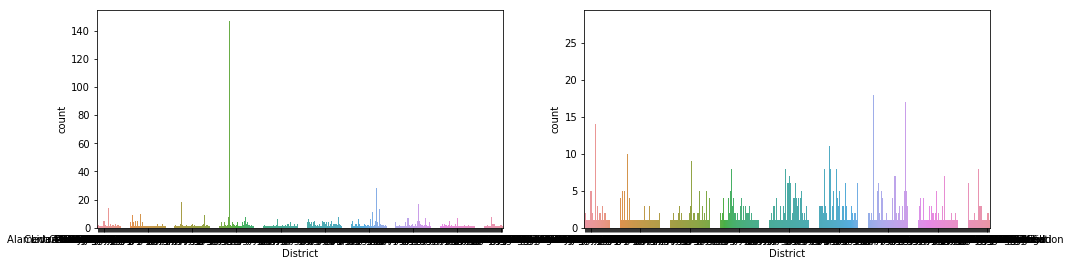

In [482]:
fig, ax = plt.subplots(1,2, figsize = (16,4))
sns.countplot(data = HS_sub, x = 'District', ax = ax[0])
sns.countplot(data = HS_sub[HS_sub.District != 'Los Angeles Unified'], x = 'District', ax = ax[1])


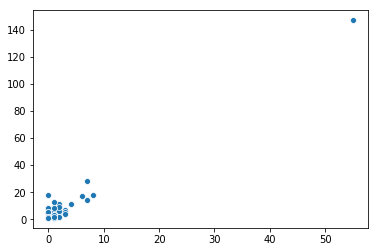

In [373]:
Districts = HS_sub.groupby('District')

num_charters = []
num_schools = []
for dist in Districts:
    num_schools.append(len(dist[1]))
    num_charters.append(sum(dist[1].CharterYN))

sns.scatterplot(x = num_charters, y = num_schools)


In [483]:
HS_sub.District.value_counts().head(10)


Los Angeles Unified        147
San Diego Unified           28
San Francisco Unified       18
Kern High                   18
East Side Union High        17
Oakland Unified             14
Sweetwater Union High       13
Sacramento City Unified     11
Grossmont Union High        11
Fresno Unified              10
Name: District, dtype: int64

In [557]:
HS_numeric = ['RegularHSGradRate_GF', 'RegularHSGradRate_GM','RegularHSGradRate_RH','RegularHSGradRate_RA', 'RegularHSGradRate_RB', 
               'MetUCCSURate_GF', 'MetUCCSURate_GM', 'MetUCCSURate_RH', 'MetUCCSURate_RA', 'MetUCCSURate_RB',
             'ELRate_12', 'MetUCCSURate_TA'] 
HS_groups = ['CohortStudentsRate_GF', 'CohortStudentsRate_GM','CohortStudentsRate_RA', 'CohortStudentsRate_RB','CohortStudentsRate_RH']

(0, 2)

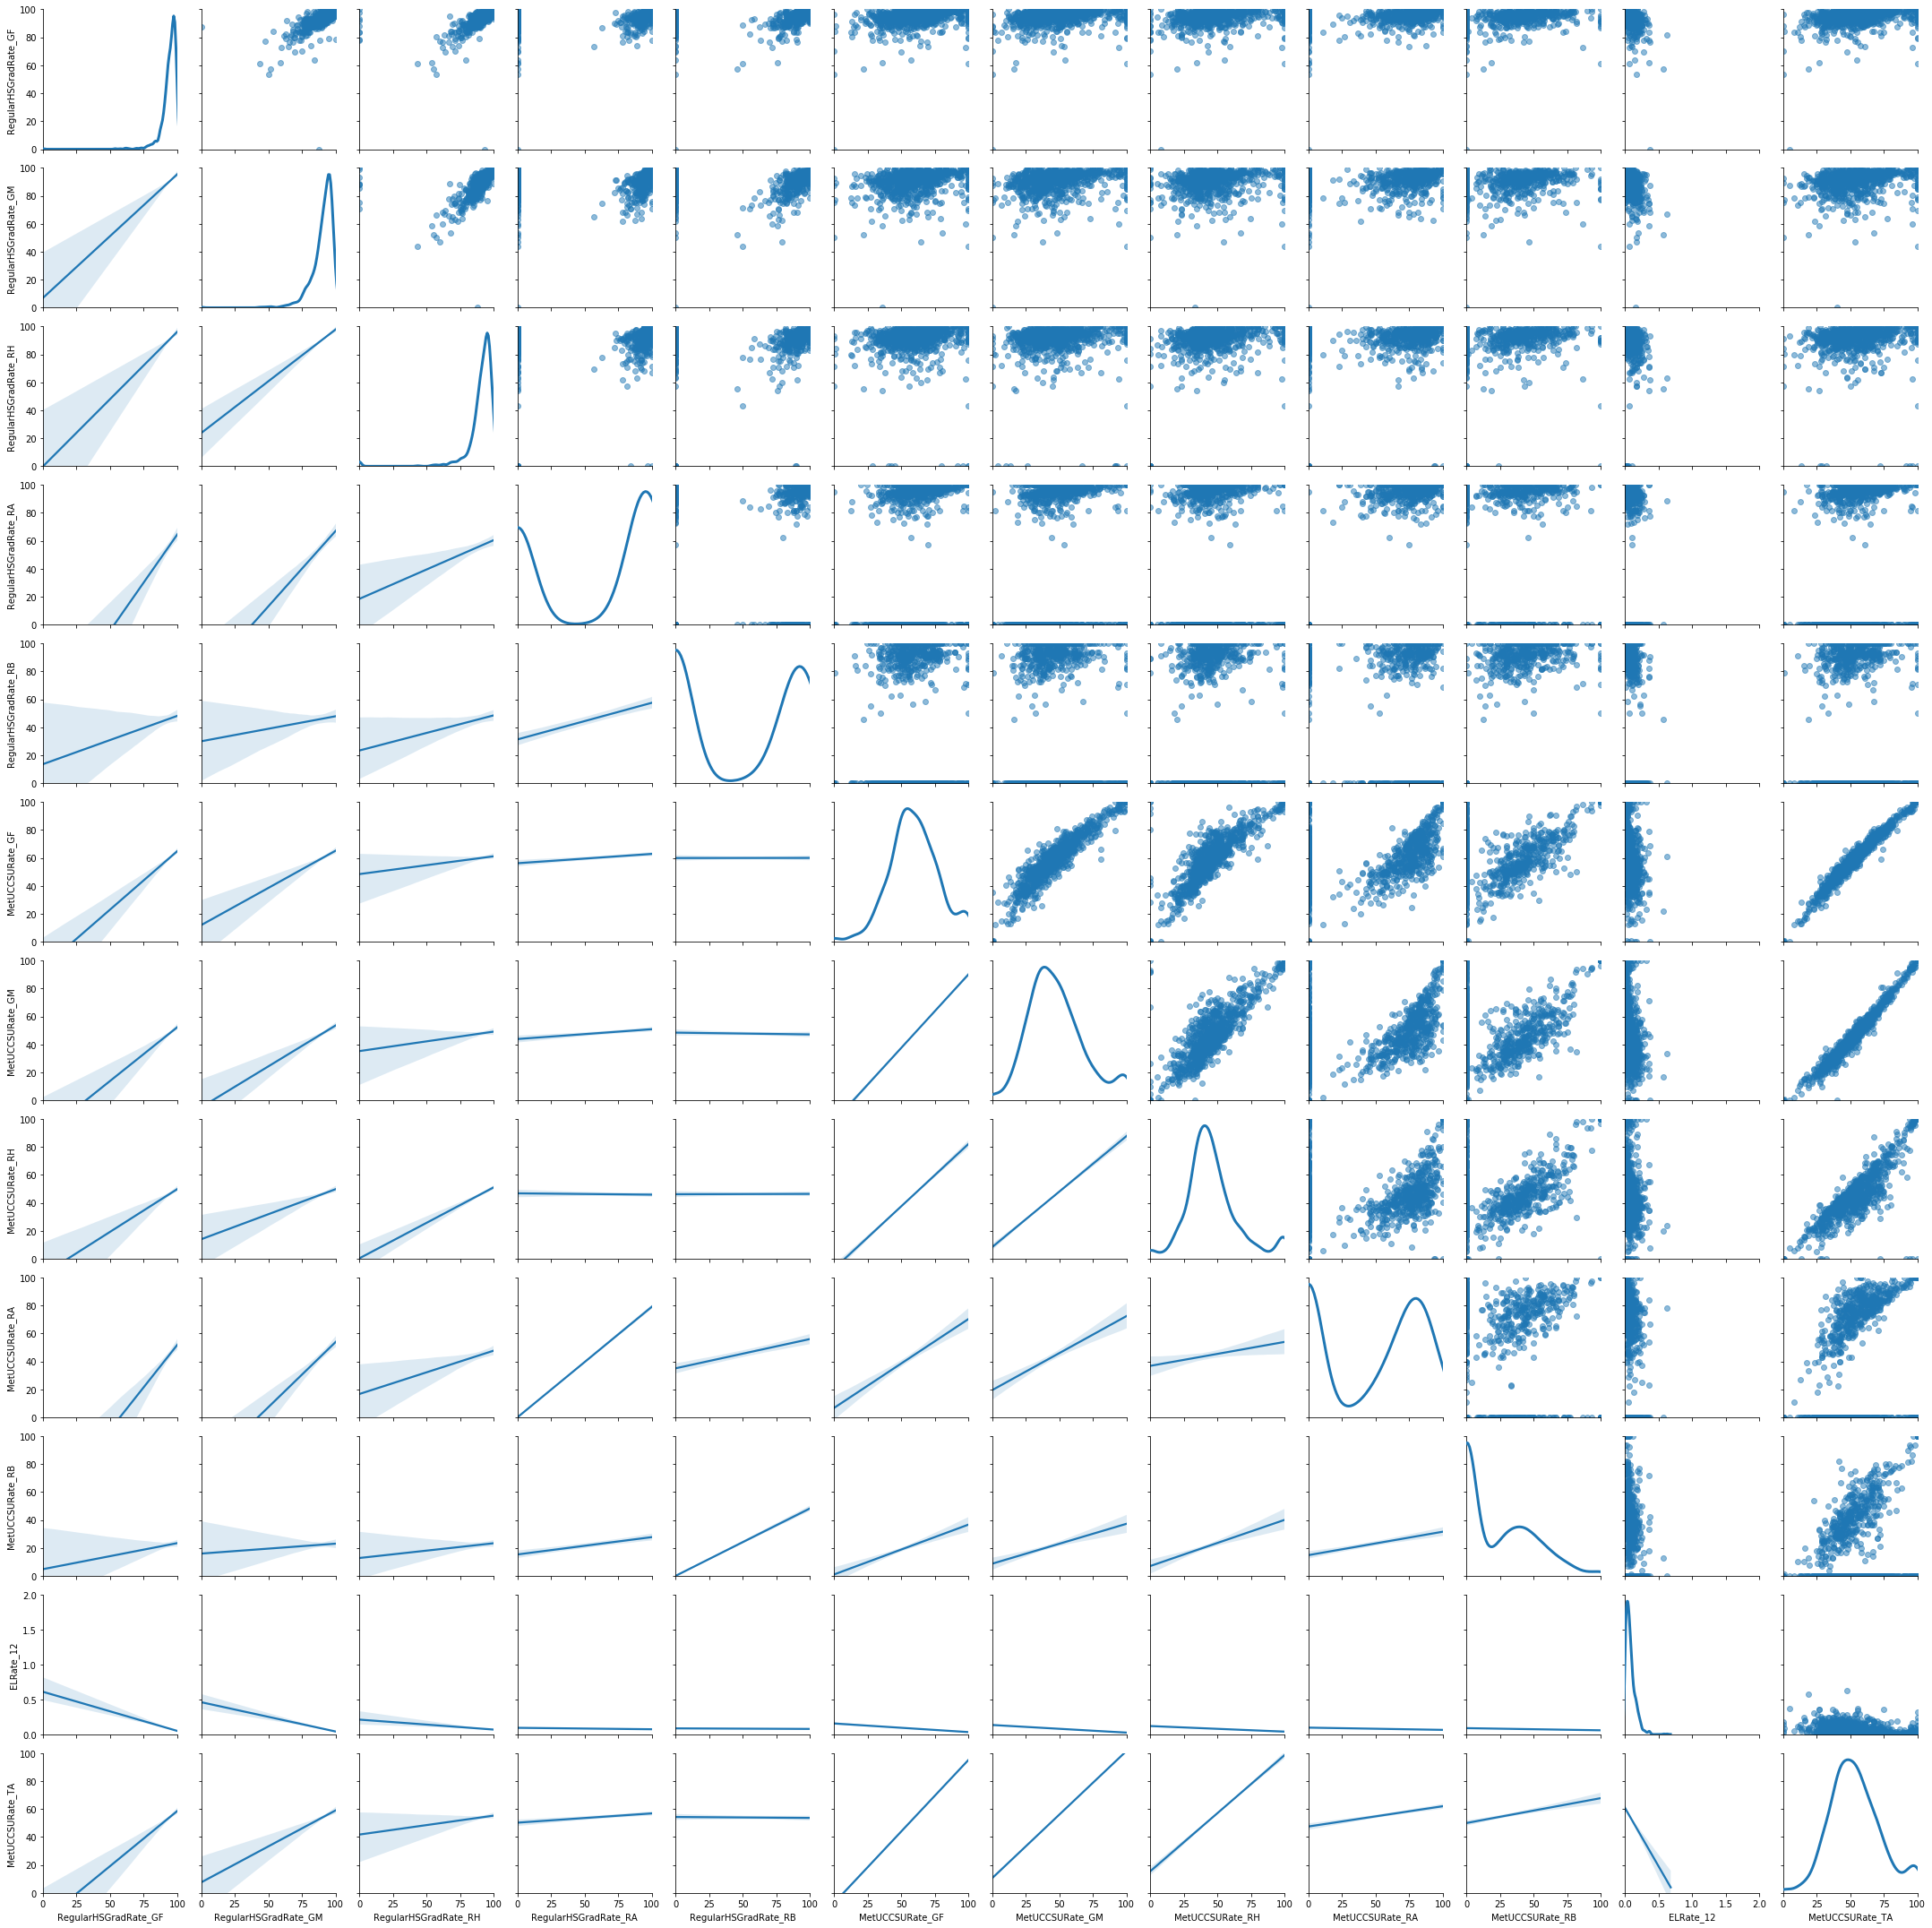

In [558]:
g = sns.PairGrid(HS_sub[HS_numeric].dropna(), diag_sharey = False)
g.map_upper(plt.scatter, alpha = .5)
g.map_lower(sns.regplot, scatter_kws= dict(alpha = 0))
g.map_diag(sns.kdeplot, lw = 3)

for ik in range(len(HS_numeric)):
    g.axes[ik,0].set_ylim(0,100)
    g.axes[0,ik].set_xlim(0,100)
    
g.axes[ik-1, 0].set_ylim(0, 2)
g.axes[0, ik-1].set_xlim(0, 2)

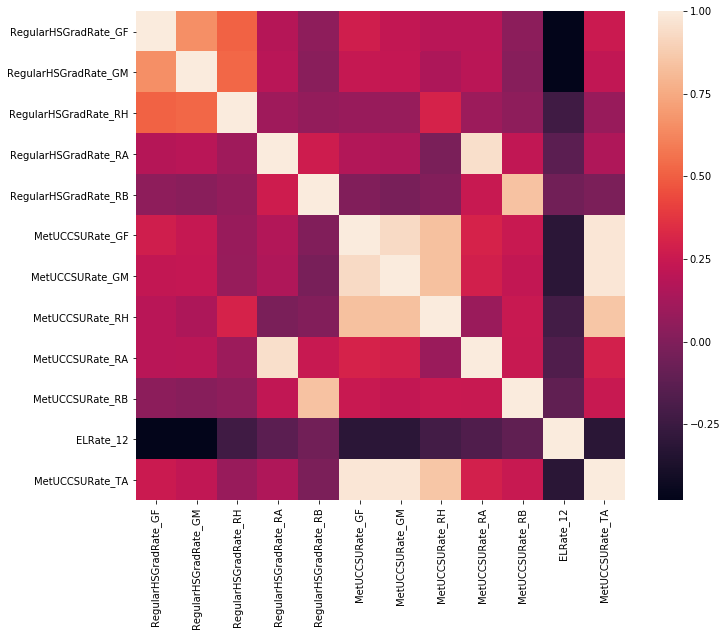

In [559]:
corrmat = HS_sub[HS_numeric].dropna().corr()

fig, ax = plt.subplots(1,1, figsize = (12,9))
sns.heatmap(corrmat, vmax = 1, square = True)

/usr/local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


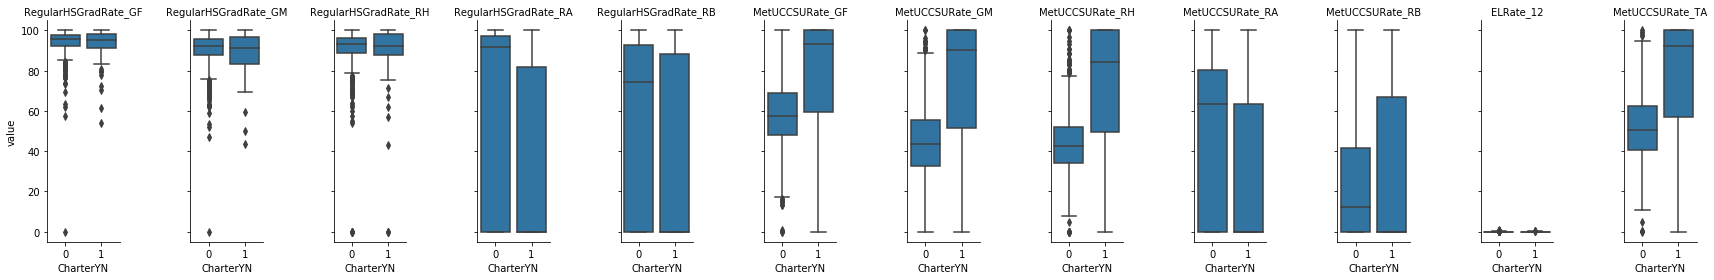

In [512]:
df_long = pd.melt(HS_sub[HS_numeric+['CharterYN']].dropna(),id_vars=['CharterYN'])
g = sns.FacetGrid(df_long, col = 'variable', size = 4, aspect= .5 )
g = g.map(sns.boxplot, "CharterYN", 'value').set_titles("{col_name}")

In [564]:
for col in HS_numeric:
    tval, pval = stats.ttest_ind(HS_sub[HS_sub['CharterYN']== 1][col].dropna(), 
                      HS_sub[HS_sub['CharterYN']== 0][col].dropna())
    print(col, pval)


RegularHSGradRate_GF 0.0518573292406
RegularHSGradRate_GM 0.0324820238685
RegularHSGradRate_RH 0.0214482150555
RegularHSGradRate_RA 5.58468340197e-09
RegularHSGradRate_RB 0.016230728354
MetUCCSURate_GF 2.674518226e-24
MetUCCSURate_GM 3.9387184396e-36
MetUCCSURate_RH 3.48026687924e-40
MetUCCSURate_RA 2.03827956165e-06
MetUCCSURate_RB 0.0113202866905
ELRate_12 0.00480894414084
MetUCCSURate_TA 6.66172937972e-32


In [563]:
HS_sub['pred_black'] = [1 if HS_sub['CohortStudentsRate_RB'][ik]>50 else 0 for ik in range(len(HS_sub))]
HS_sub['pred_hisp'] = [1 if HS_sub['CohortStudentsRate_RH'][ik]>50 else 0 for ik in range(len(HS_sub))]

In [565]:
for col in HS_numeric:
    tval, pval = stats.ttest_ind(HS_sub[HS_sub['pred_black']== 1][col].dropna(), 
                      HS_sub[HS_sub['pred_black']== 0][col].dropna())
    print(col, pval)


RegularHSGradRate_GF 0.0114834013329
RegularHSGradRate_GM 0.85332174935
RegularHSGradRate_RH 6.6850329806e-23
RegularHSGradRate_RA 0.0355342411133
RegularHSGradRate_RB 0.100489737561
MetUCCSURate_GF 0.289870519508
MetUCCSURate_GM 0.334444930261
MetUCCSURate_RH 0.0382901951814
MetUCCSURate_RA 0.0450147510841
MetUCCSURate_RB 0.0122336000428
ELRate_12 0.332537009853
MetUCCSURate_TA 0.349747620523


In [566]:
for col in HS_numeric:
    tval, pval = stats.ttest_ind(HS_sub[HS_sub['pred_hisp']== 1][col].dropna(), 
                      HS_sub[HS_sub['pred_hisp']== 0][col].dropna())
    print(col, pval)


RegularHSGradRate_GF 4.71547811954e-07
RegularHSGradRate_GM 1.13757931616e-11
RegularHSGradRate_RH 0.589047099012
RegularHSGradRate_RA 8.27091864482e-22
RegularHSGradRate_RB 0.707332182128
MetUCCSURate_GF 3.35348452956e-08
MetUCCSURate_GM 2.13331343184e-10
MetUCCSURate_RH 0.19548188118
MetUCCSURate_RA 1.91169310405e-22
MetUCCSURate_RB 0.638070780516
ELRate_12 5.30187559805e-36
MetUCCSURate_TA 2.85945941803e-09


In [568]:
# Create a new variable seperating big schoool districts from small (which is to say Los Angeles from else)
x = []
for dist in HS_sub.groupby('District'):
    if len(dist[1])>30:
        x = x + [1]*len(dist[1])
    else:
        x = x + [0]*len(dist[1])

HS_sub['big_dist'] = x

In [570]:
for col in HS_numeric:
    tval, pval = stats.ttest_ind(HS_sub[HS_sub['big_dist']== 1][col].dropna(), 
                      HS_sub[HS_sub['big_dist']== 0][col].dropna())
    print(col, pval)


RegularHSGradRate_GF 0.0361822197759
RegularHSGradRate_GM 0.0418365771926
RegularHSGradRate_RH 0.0506339882879
RegularHSGradRate_RA 0.0174838073877
RegularHSGradRate_RB 0.000201070912004
MetUCCSURate_GF 0.257903130439
MetUCCSURate_GM 0.253454539312
MetUCCSURate_RH 0.0138422475816
MetUCCSURate_RA 0.00881860886887
MetUCCSURate_RB 0.00265037469199
ELRate_12 0.303088072035
MetUCCSURate_TA 0.230964520486


In [582]:
# Create a new variable seperating big schoool districts from small (which is to say Los Angeles from else)
x = []
for dist in HS_sub.groupby('District'):
    if len(dist[1])<15:
        x = x + [1]*len(dist[1])
    else:
        x = x + [0]*len(dist[1])

HS_sub['small_dist'] = x

In [583]:
for col in HS_numeric:
    tval, pval = stats.ttest_ind(HS_sub[HS_sub['small_dist']== 1][col].dropna(), 
                      HS_sub[HS_sub['small_dist']== 0][col].dropna())
    print(col, pval)


RegularHSGradRate_GF 0.00258394019928
RegularHSGradRate_GM 0.00304731295041
RegularHSGradRate_RH 0.0121155201987
RegularHSGradRate_RA 0.0263182126613
RegularHSGradRate_RB 0.0489098711109
MetUCCSURate_GF 0.421206098824
MetUCCSURate_GM 0.588714260761
MetUCCSURate_RH 0.57879298832
MetUCCSURate_RA 0.0063981946726
MetUCCSURate_RB 0.398191817466
ELRate_12 0.440561776433
MetUCCSURate_TA 0.531680575336


## GRAVEYARD

1082 1082


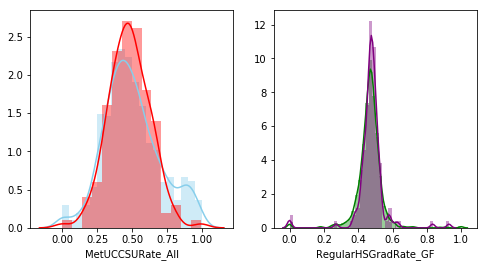

In [470]:
# Create a new variable seperating big schoool districts from small (which is to say Los Angeles from else)
x = []
for dist in HS_sub.groupby('District'):
    if len(dist[1])<30:
        x = x + [1]*len(dist[1])
    else:
        x = x + [0]*len(dist[1])

HS_sub['small_dist'] = x

fig, ax = plt.subplots(1, 2, figsize = (8, 4))
print(len(HS_sub['MetUCCSURate_All'].dropna()), len(HS_sub['MetUCCSURate_All']))
sns.distplot(HS_sub[HS_sub.small_dist == 1]['MetUCCSURate_TA'].dropna(), color= 'skyblue', ax = ax[0])
sns.distplot(HS_sub[HS_sub.small_dist == 0]['MetUCCSURate_TA'].dropna(), color= 'red', ax = ax[0])

sns.distplot(HS_sub[HS_sub.small_dist == 1]['RegularHSGradRate_GF'].dropna(), color= 'green', ax = ax[1])
sns.distplot(HS_sub[HS_sub.small_dist == 0]['RegularHSGradRate_GF'].dropna(), color= 'purple', ax = ax[1])
# There is no number that demonstrates that school district size has an appreciable effect
# on UC/CSU eligibility

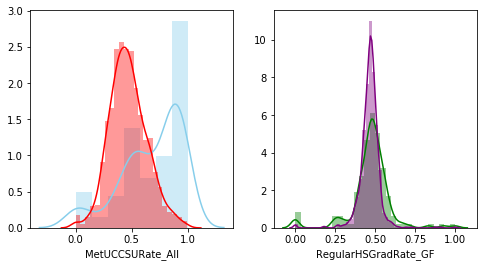

In [471]:
# print(len(HS_sub['MetUCCSURate_All'].dropna()), len(HS_sub['MetUCCSURate_All']))
# sns.distplot(HS_sub[HS_sub.CharterYN == 1]['MetUCCSURate_All'].dropna(), color= 'skyblue')
# sns.distplot(HS_sub[HS_sub.CharterYN == 0]['MetUCCSURate_All'].dropna(), color= 'red')

fig, ax = plt.subplots(1, 2, figsize = (8, 4))
# print(len(HS_sub['MetUCCSURate_All'].dropna()), len(HS_sub['MetUCCSURate_All']))
sns.distplot(HS_sub[HS_sub.CharterYN == 1]['MetUCCSURate_All'].dropna(), color= 'skyblue', ax = ax[0])
sns.distplot(HS_sub[HS_sub.CharterYN == 0]['MetUCCSURate_All'].dropna(), color= 'red', ax = ax[0])

sns.distplot(HS_sub[HS_sub.CharterYN == 1]['RegularHSGradRate_GF'].dropna(), color= 'green', ax = ax[1])
sns.distplot(HS_sub[HS_sub.CharterYN == 0]['RegularHSGradRate_GF'].dropna(), color= 'purple', ax = ax[1])
# There is no number that demonstrates that school district size has an appreciable effect
# on UC/CSU eligibility

1082 1082


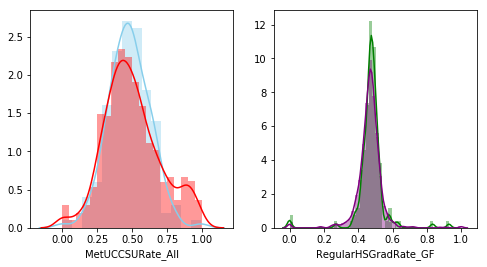

In [472]:
# Create a new variable seperating big schoool districts from small (which is to say Los Angeles from else)
x = []
for dist in HS_sub.groupby('District'):
    if len(dist[1])>30:
        x = x + [1]*len(dist[1])
    else:
         x = x + [0]*len(dist[1])

HS_sub['big_dist'] = x

fig, ax = plt.subplots(1, 2, figsize = (8, 4))
print(len(HS_sub['MetUCCSURate_All'].dropna()), len(HS_sub['MetUCCSURate_All']))
sns.distplot(HS_sub[HS_sub.big_dist == 1]['MetUCCSURate_All'].dropna(), color= 'skyblue', ax = ax[0])
sns.distplot(HS_sub[HS_sub.big_dist == 0]['MetUCCSURate_All'].dropna(), color= 'red', ax = ax[0])

sns.distplot(HS_sub[HS_sub.big_dist == 1]['RegularHSGradRate_GF'].dropna(), color= 'green', ax = ax[1])
sns.distplot(HS_sub[HS_sub.big_dist == 0]['RegularHSGradRate_GF'].dropna(), color= 'purple', ax = ax[1])
# There is no number that demonstrates that school district size has an appreciable effect
# on UC/CSU eligibility

In [473]:
HS_sub[['CharterYN',
       'MetUCCSURate_RH', 'RegularHSGradRate_GF', 'MetUCCSURate_All',
       'small_dist', 'EL_GR12_rate']].describe()

,CharterYN,MetUCCSURate_RH,RegularHSGradRate_GF,MetUCCSURate_All,small_dist,EL_GR12_rate
count,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000
mean,0.131238,0.234009,0.467025,0.496707,0.869686,0.087434
std,0.337817,0.188575,0.076567,0.196696,0.336805,0.077978
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.094427,0.440808,0.366973,1.000000,0.029908
50%,0.000000,0.188435,0.470588,0.474827,1.000000,0.067024
75%,0.000000,0.315079,0.497877,0.612209,1.000000,0.124358
max,1.000000,0.980769,1.000000,1.000000,1.000000,0.629630


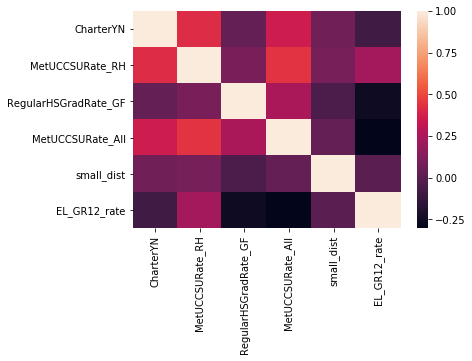

In [474]:
corr = HS_sub[['CharterYN',
       'MetUCCSURate_RH', 'RegularHSGradRate_GF', 'MetUCCSURate_All',
       'small_dist', 'EL_GR12_rate']].corr()
sns.heatmap(corr)

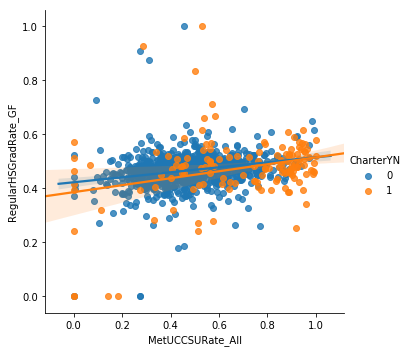

In [452]:
sns.lmplot(data = HS_sub, x = 'MetUCCSURate_All', y = 'RegularHSGradRate_GF', hue = 'CharterYN')


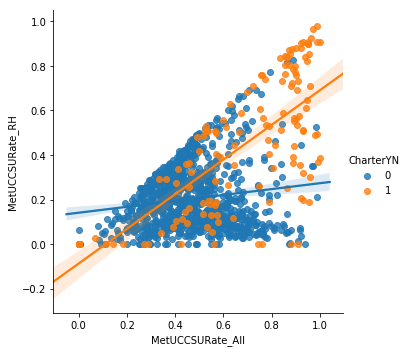

In [453]:
sns.lmplot(data = HS_sub, x = 'MetUCCSURate_All', y = 'MetUCCSURate_RH', hue = 'CharterYN')


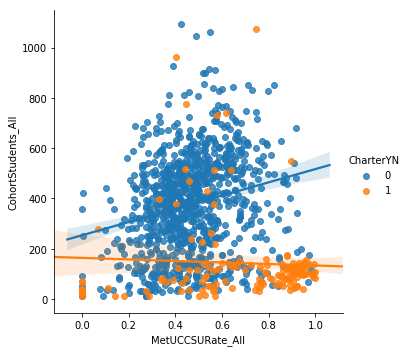

In [454]:
sns.lmplot(data = HS_sub, x = 'MetUCCSURate_All', y = 'CohortStudents_All', hue = 'CharterYN')


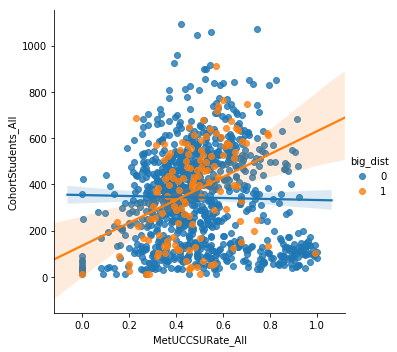

In [455]:
sns.lmplot(data = HS_sub, x = 'MetUCCSURate_All', y = 'CohortStudents_All', hue = 'big_dist')


In [456]:
# created a variable that represents the percentage of the 12th grade who are ELs
x = []
for ik in range(len(HS_sub)):
    x.append(HS_sub['Total_EL_12'][ik]/HS_sub['CohortStudents_All'][ik])

HS_sub['EL_GR12_rate'] = x

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


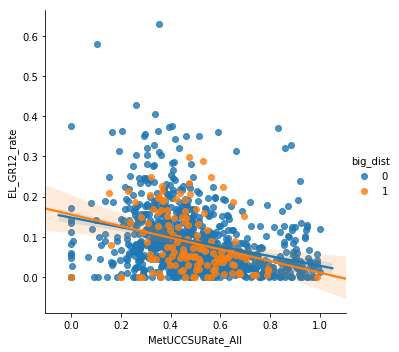

In [457]:
sns.lmplot(data = HS_sub, x = 'MetUCCSURate_All', y = 'EL_GR12_rate', hue = 'big_dist')


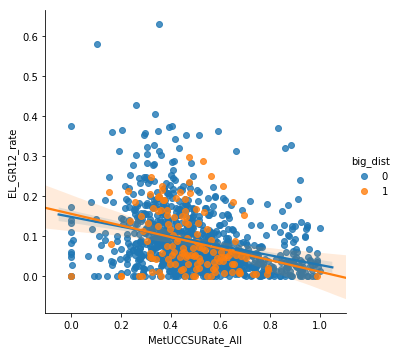

In [458]:
sns.lmplot(data = HS_sub, x = 'MetUCCSURate_All', y = 'EL_GR12_rate', hue = 'big_dist')


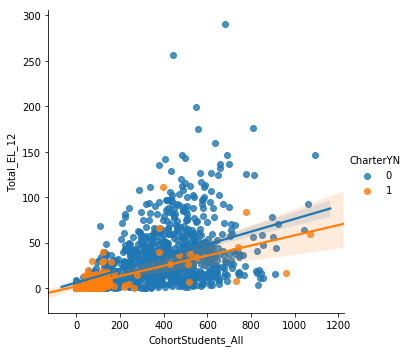

In [459]:
sns.lmplot(data = HS_sub, x = 'CohortStudents_All', y = 'Total_EL_12', hue = 'CharterYN')


In [430]:
HS3 = HS2
threshold = 0.2

# HS3 = HS3.drop(['NCESDist', 'NCESSchool', 'ClosedDate','DOC','SOC'], axis= 1)
HS3 = HS3.drop(HS3.std()[HS3.std() < threshold].index.values, axis=1)

In [434]:
HS3 = HS2
non_numeric = ['StatusType', 'County', 'District', 'School', 'City', 'Zip', 'OpenDate',
       'Charter', 'CharterNum', 'FundingType', 'DOCType', 'SOCType',
       'EdOpsCode', 'EdOpsName', 'EILCode', 'EILName', 'GSoffered', 'GSserved',
       'Virtual', 'Magnet', 'Latitude', 'Longitude', 'CharterYN']

non_numeric = ['District', 'OpenDate', 'GSoffered','GSserved']

HS3.drop(non_numeric + ["MetUCCSURate_All"], axis=1).apply(lambda x: x.corr(HS3.MetUCCSURate_All)).sort_values(ascending = False)


/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


MetUCCSURate_TA               0.976376
MetUCCSURate_GF               0.955825
MetUCCSURate_GM               0.949007
MetUCCSURate_SS               0.849399
MetUCCSURate_RH               0.815025
MetUCCSURate_SD               0.531043
MetUCCSURate_SE               0.477528
MetUCCSURate_RW               0.456218
MetUCCSUCount_SD              0.436970
MetUCCSUCount_GM              0.431773
MetUCCSUCount_All             0.391319
MetUCCSUCount_TA              0.391284
MetUCCSUCount_RW              0.365361
CharterYN                     0.355472
MetUCCSURate_RT               0.352674
MetUCCSUCount_GF              0.349656
MetUCCSUCount_RT              0.340229
RegularHSGradRate_TA          0.333662
RegularHSGradRate_All         0.329043
MetUCCSURate_RA               0.323728
MetUCCSUCount_RA              0.321140
RegularHSGradRate_GF          0.317065
RegularHSGradCount_RA         0.276634
RegularHSGradRate_GM          0.270559
CohortStudents_RA             0.269470
RegularHSGradCount_RT    

In [259]:
HS3.CharterYN

CDS
01100170112607    Yes
01611190130229     No
01611190130625    Yes
01611270130450     No
01611430131177     No
01611500132225     No
01611680132746     No
01611760130062     No
01611760134270     No
01611760134452     No
01611760135244     No
01611760138693     No
01611920108670    Yes
01611920127944    Yes
01611920133629     No
01611920135319     No
01611920138339     No
01612000133397     No
01612000134536     No
01612340130054     No
01612420134668     No
01612590100065    Yes
01612590100701     No
01612590108944    Yes
01612590110189     No
01612590111856    Yes
01612590114868    Yes
01612590115238    Yes
01612590125161     No
01612590125716     No
                 ... 
56725205634076     No
56725460120634    Yes
56725460131698    NaN
56725465630389     No
56725465631619     No
56725465631742     No
56725465632849     No
56725465634548     No
56725465634761     No
56726035630322     No
56726035635008     No
56726035636188     No
56726525630348     No
56726525630793     No
567265

In [257]:
HS3.columns[:50]

Index(['StatusType', 'County', 'District', 'School', 'City', 'Zip', 'OpenDate',
       'Charter', 'CharterNum', 'FundingType', 'DOCType', 'SOCType',
       'EdOpsCode', 'EdOpsName', 'EILCode', 'EILName', 'GSoffered', 'GSserved',
       'Virtual', 'Magnet', 'Latitude', 'Longitude', 'GSoffered_min',
       'CharterYN', 'CohortStudents_GF', 'RegularHSGradCount_GF',
       'RegularHSGradRate_GF', 'MetUCCSUCount_GF', 'MetUCCSURate_GF',
       'DropoutCount_GF', 'DropoutRate_GF', 'CohortStudents_GM',
       'RegularHSGradCount_GM', 'RegularHSGradRate_GM', 'MetUCCSUCount_GM',
       'MetUCCSURate_GM', 'DropoutCount_GM', 'DropoutRate_GM',
       'CohortStudents_GN', 'RegularHSGradCount_GN', 'RegularHSGradRate_GN',
       'MetUCCSUCount_GN', 'MetUCCSURate_GN', 'DropoutCount_GN',
       'DropoutRate_GN', 'CohortStudents_RA', 'RegularHSGradCount_RA',
       'RegularHSGradRate_RA', 'MetUCCSUCount_RA', 'MetUCCSURate_RA'],
      dtype='object')